In [140]:
#imports
#numpy, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

#estimators
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.cross_validation import train_test_split
from sklearn.covariance import EmpiricalCovariance

In [147]:
#Models
modelLR = LogisticRegression()
modelSVC = SVC()
modelKNC = KNeighborsClassifier()
modelTree = tree.DecisionTreeClassifier()
modelMLPC = MLPClassifier()
modelGBC = GradientBoostingClassifier()
modelRBF = RBF()
modelRFC = RandomForestClassifier()
modelGNB = GaussianNB()

In [55]:
#data
rawData = pd.read_csv('credit.csv', header=0)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [56]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_1                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In this dataset there are data that doesn't make sense and questionable. Therefore the data will be subset to remove the data that are "questionable".

Question 1: NO CONSUMPTION in all Pay_Amt columns BUT has Bill AMOUNT??

In below table, you will notice that the subset wherein Pay_amt1 to Pay_Amt6 has value of -2 (no consumption) wherein there are non-zero values on the Bill Amount columns. If the customers did not have any consumption, why would there be any bill amount? Are these bill amounts carry over? From when?


In [57]:
noConsumption = rawData.query('PAY_1==-2 & PAY_2==-2 & PAY_3==-2 & PAY_4==-2 & PAY_5==-2 & PAY_6==-2')
noConsumption.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
23,24,450000,2,1,1,40,-2,-2,-2,-2,...,560,0,0,19428,1473,560,0,0,1128,1
33,34,500000,2,2,1,54,-2,-2,-2,-2,...,7521,71439,8981,4152,22827,7521,71439,981,51582,0
34,35,500000,1,1,1,58,-2,-2,-2,-2,...,3180,0,5293,5006,31178,3180,0,5293,768,0
45,46,210000,1,1,2,29,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
52,53,310000,2,2,1,49,-2,-2,-2,-2,...,11185,3544,464,7875,7600,11185,3544,464,0,0


In [111]:
noConsumption.to_csv('noConsumption.csv')
noConsumption.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2109 entries, 23 to 29985
Data columns (total 25 columns):
ID                            2109 non-null int64
LIMIT_BAL                     2109 non-null int64
SEX                           2109 non-null int64
EDUCATION                     2109 non-null int64
MARRIAGE                      2109 non-null int64
AGE                           2109 non-null int64
PAY_1                         2109 non-null int64
PAY_2                         2109 non-null int64
PAY_3                         2109 non-null int64
PAY_4                         2109 non-null int64
PAY_5                         2109 non-null int64
PAY_6                         2109 non-null int64
BILL_AMT1                     2109 non-null int64
BILL_AMT2                     2109 non-null int64
BILL_AMT3                     2109 non-null int64
BILL_AMT4                     2109 non-null int64
BILL_AMT5                     2109 non-null int64
BILL_AMT6                     2109 non-nu

Question 2: No consumption BUT is defaulting????

In addition to Question 1, below is a graph that depicts what I am considering as questionable data that will need to be verified further with the SME's for this dataset or with the credit default experts in the industry. 

As you see in below graph, out of 2109 observations wherein the value is -2 (NO CONSUMPTION) is shown accross all Pay_Amt1 to Pay_Amt6 -- the data is showing that there are 250+ that are considered in "default". 

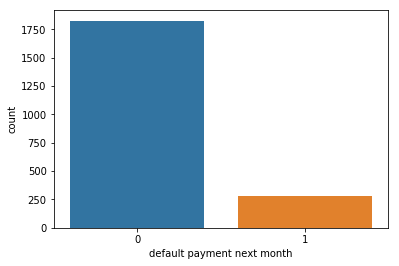

In [112]:
sns.countplot(x="default payment next month", data=noConsumption)

Question 3: PAID in FULL in All Pay_Amt Columns but Defaulting?

In this table and below graph,out of 1992 observations wherein the value is -1 (PAID IN FULL) is shown accross all Pay_Amt1 to Pay_Amt6 -- the data is showing that there are 200+ that are considered in "default".

In [59]:
PaidinFull = rawData.query('PAY_1==-1 & PAY_2==-1 & PAY_3==-1 & PAY_4==-1 & PAY_5==-1 & PAY_6==-1')
PaidinFull.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
21,22,120000,2,2,1,39,-1,-1,-1,-1,...,0,632,316,316,316,0,632,316,0,1
28,29,50000,2,3,1,47,-1,-1,-1,-1,...,2040,30430,257,3415,3421,2044,30430,257,0,0
30,31,230000,2,1,2,27,-1,-1,-1,-1,...,15339,14307,36923,17270,13281,15339,14307,37292,0,0
48,49,380000,1,2,2,32,-1,-1,-1,-1,...,32018,11849,11873,21540,15138,24677,11851,11875,8251,0
70,71,80000,1,1,2,31,-1,-1,-1,-1,...,390,390,390,0,390,390,390,390,390,0


In [107]:
PaidinFull.to_csv('PaidinFull.csv')
PaidinFull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 21 to 29942
Data columns (total 25 columns):
ID                            1992 non-null int64
LIMIT_BAL                     1992 non-null int64
SEX                           1992 non-null int64
EDUCATION                     1992 non-null int64
MARRIAGE                      1992 non-null int64
AGE                           1992 non-null int64
PAY_1                         1992 non-null int64
PAY_2                         1992 non-null int64
PAY_3                         1992 non-null int64
PAY_4                         1992 non-null int64
PAY_5                         1992 non-null int64
PAY_6                         1992 non-null int64
BILL_AMT1                     1992 non-null int64
BILL_AMT2                     1992 non-null int64
BILL_AMT3                     1992 non-null int64
BILL_AMT4                     1992 non-null int64
BILL_AMT5                     1992 non-null int64
BILL_AMT6                     1992 non-nu

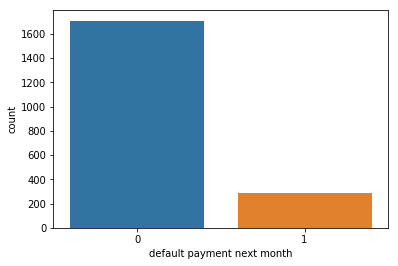

In [108]:
sns.countplot(x="default payment next month", data=PaidinFull)

In [61]:
Revolving = rawData.query('PAY_1==0 & PAY_2==0 & PAY_3==0 & PAY_4==0 & PAY_5==0 & PAY_6==0')
Revolving.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
14,15,250000,1,1,2,29,0,0,0,0,...,59696,56875,55512,3000,3000,3000,3000,3000,3000,0


In [109]:
Revolving.to_csv('Revolving.csv')
Revolving.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9821 entries, 2 to 29999
Data columns (total 25 columns):
ID                            9821 non-null int64
LIMIT_BAL                     9821 non-null int64
SEX                           9821 non-null int64
EDUCATION                     9821 non-null int64
MARRIAGE                      9821 non-null int64
AGE                           9821 non-null int64
PAY_1                         9821 non-null int64
PAY_2                         9821 non-null int64
PAY_3                         9821 non-null int64
PAY_4                         9821 non-null int64
PAY_5                         9821 non-null int64
PAY_6                         9821 non-null int64
BILL_AMT1                     9821 non-null int64
BILL_AMT2                     9821 non-null int64
BILL_AMT3                     9821 non-null int64
BILL_AMT4                     9821 non-null int64
BILL_AMT5                     9821 non-null int64
BILL_AMT6                     9821 non-nul

Question 4: USE OF REVOLVING CREDIT BUT IN DEFAULT? 

In below graph,out of 9,821 observations wherein the value is 0 (USE OF REVOLVING CREDIT) is shown accross all Pay_Amt1 to Pay_Amt6 -- the data is showing that there are 500-1000 that are considered in "default".

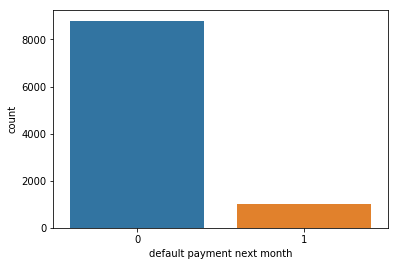

In [110]:
sns.countplot(x="default payment next month", data=Revolving)

In [66]:
refinedData = pd.concat([rawData, noConsumption, PaidinFull, Revolving]).drop_duplicates(keep=False)
refinedData.to_csv('refinedData.scv')
refinedData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


In [113]:
refinedData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16078 entries, 0 to 29998
Data columns (total 25 columns):
ID                            16078 non-null int64
LIMIT_BAL                     16078 non-null int64
SEX                           16078 non-null int64
EDUCATION                     16078 non-null int64
MARRIAGE                      16078 non-null int64
AGE                           16078 non-null int64
PAY_1                         16078 non-null int64
PAY_2                         16078 non-null int64
PAY_3                         16078 non-null int64
PAY_4                         16078 non-null int64
PAY_5                         16078 non-null int64
PAY_6                         16078 non-null int64
BILL_AMT1                     16078 non-null int64
BILL_AMT2                     16078 non-null int64
BILL_AMT3                     16078 non-null int64
BILL_AMT4                     16078 non-null int64
BILL_AMT5                     16078 non-null int64
BILL_AMT6               

In [114]:
refinedData.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,16078.000000,16078.000000,16078.000000,16078.000000,16078.000000,16078.000000,16078.000000,16078.000000,16078.000000,16078.000000,...,16078.000000,16078.000000,16078.000000,16078.000000,1.607800e+04,16078.000000,16078.000000,16078.000000,16078.000000,16078.000000
mean,14713.027678,152642.244060,1.597089,1.850168,1.557345,35.158229,0.355081,0.136646,0.076129,-0.025501,...,32355.842145,30743.047145,29967.566924,5467.204316,6.127104e+03,5312.330327,4881.309242,4633.170419,4908.061948,0.313596
std,8628.537455,126007.876576,0.490498,0.774029,0.523184,9.240491,1.257925,1.428454,1.438780,1.411430,...,54411.888597,53148.118072,51884.584125,19108.347390,2.902217e+04,21012.965136,18361.215417,16655.344984,18299.223191,0.463969
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7267.250000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,934.250000,652.000000,429.250000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14548.500000,120000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,12880.500000,10918.500000,10081.000000,1700.000000,1.531000e+03,1200.000000,1000.000000,1000.000000,1000.000000,0.000000
75%,22010.750000,220000.000000,2.000000,2.000000,2.000000,41.000000,1.000000,2.000000,2.000000,0.000000,...,38172.000000,34891.500000,33879.000000,4249.750000,4.000000e+03,3520.750000,3165.500000,3100.000000,3156.000000,1.000000
max,29999.000000,1000000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [75]:
corrRefined = refinedData.corr()
print(corrRefined)

                                  ID  LIMIT_BAL       SEX  EDUCATION  \
ID                          1.000000   0.006507  0.007267   0.042711   
LIMIT_BAL                   0.006507   1.000000  0.037719  -0.240635   
SEX                         0.007267   0.037719  1.000000  -0.002558   
EDUCATION                   0.042711  -0.240635 -0.002558   1.000000   
MARRIAGE                   -0.027854  -0.113850 -0.035513  -0.131994   
AGE                         0.019525   0.143759 -0.083191   0.169583   
PAY_1                      -0.003403  -0.251412 -0.056734   0.108498   
PAY_2                       0.019354  -0.306708 -0.078016   0.131144   
PAY_3                       0.006479  -0.292938 -0.070760   0.118039   
PAY_4                       0.029333  -0.266594 -0.061562   0.107526   
PAY_5                      -0.001869  -0.240395 -0.053596   0.087553   
PAY_6                      -0.000462  -0.222301 -0.037167   0.063891   
BILL_AMT1                   0.012472   0.200162 -0.051278   0.02

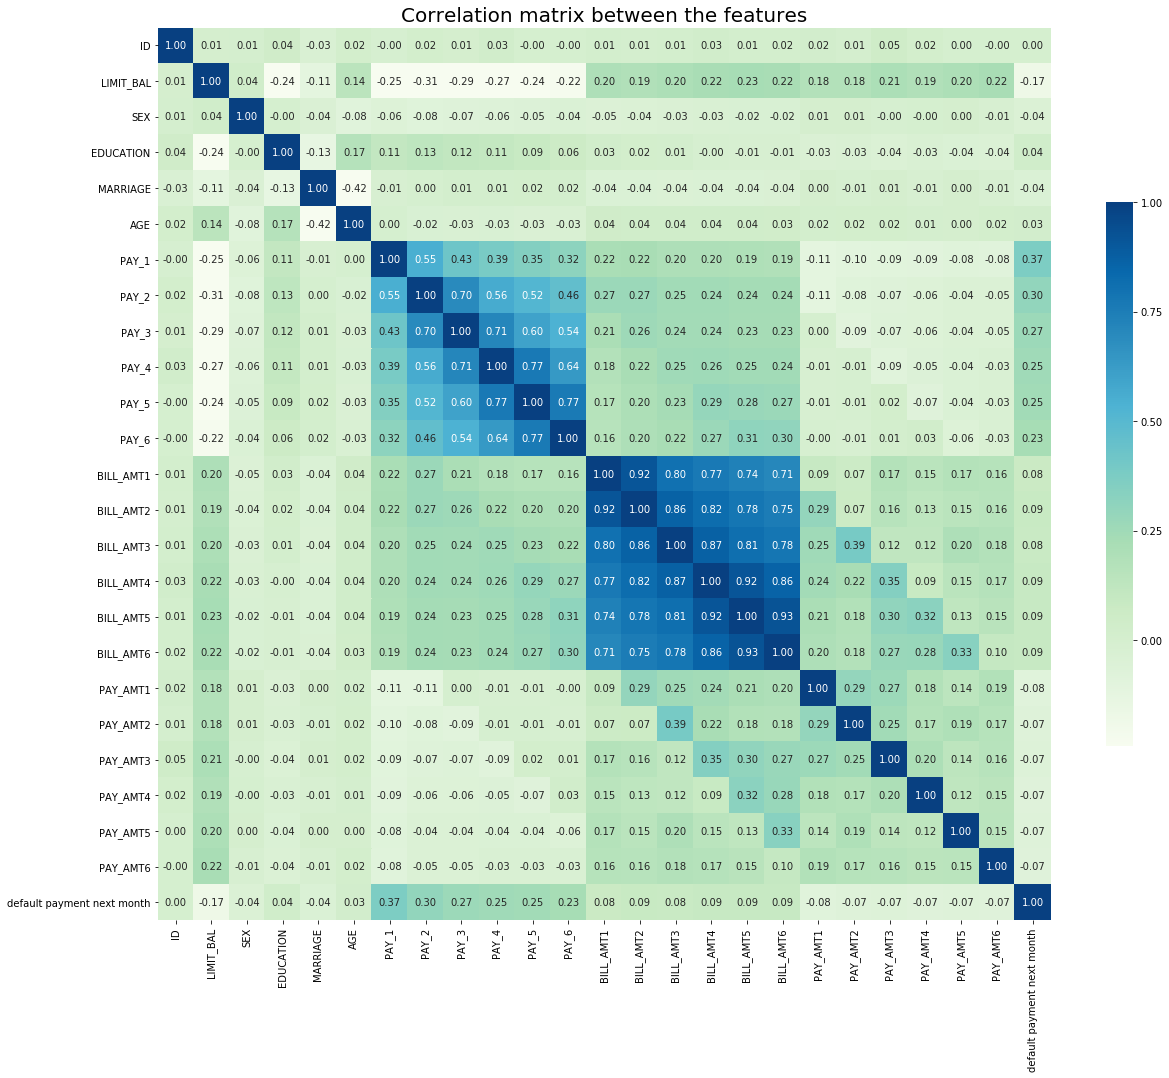

In [161]:
plt.figure(figsize=(20,20))
ax = sns.heatmap(corrRefined, vmax=1, square=True, annot=True,fmt='.2f', cmap ='GnBu', cbar_kws={"shrink": 0.5}, robust=True)
plt.title('Correlation matrix between the features', fontsize=20)
plt.show()

In [79]:
covRefined = refinedData.cov()
print(covRefined)

                                      ID     LIMIT_BAL          SEX  \
ID                          7.445166e+07  7.075226e+06    30.757809   
LIMIT_BAL                   7.075226e+06  1.587798e+10  2331.309139   
SEX                         3.075781e+01  2.331309e+03     0.240589   
EDUCATION                   2.852559e+02 -2.346998e+04    -0.000971   
MARRIAGE                   -1.257403e+02 -7.505576e+03    -0.009113   
AGE                         1.556735e+03  1.673889e+05    -0.377060   
PAY_1                      -3.694029e+01 -3.985088e+04    -0.035005   
PAY_2                       2.385518e+02 -5.520638e+04    -0.054662   
PAY_3                       8.043205e+01 -5.310904e+04    -0.049937   
PAY_4                       3.572331e+02 -4.741411e+04    -0.042619   
PAY_5                      -2.203899e+01 -4.139562e+04    -0.035925   
PAY_6                      -5.573127e+00 -3.914173e+04    -0.025474   
BILL_AMT1                   6.525223e+06  1.529376e+09 -1525.123986   
BILL_A

In [81]:
variableName = refinedData.iloc[:,0:4]
variableName.head()

,ID,LIMIT_BAL,SEX,EDUCATION
0,1,20000,2,2
1,2,120000,2,2
4,5,50000,1,2
7,8,100000,2,2
8,9,140000,2,3


In [115]:
#features
features = refinedData.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689
7,11876,380,601,221,-159,567,380,601,0,581,1687
8,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000


In [131]:
def get_train_test(refinedData, y_col, x_cols, ratio=70):
    mask = np.random.rand(len(refinedData)) < ratio
    refinedData_train = refinedData[mask]
    refinedData_test = refinedData[~mask]
    Y_train = refinedData_train[y_col].values
    Y_test = refinedData_test[y_col].values
    X_train = refinedData_train[x_cols].values
    X_test = refinedData_test[x_cols].values
    return refinedData_train, refinedData_test, X_train, Y_train, X_test, Y_test

y_col = 'default payment next month'
x_cols = list(refinedData.columns.values)
x_cols.remove(y_col)

train_test_ratio = 0.7
refinedData_train, refinedData_test, X_train, Y_train, X_test, Y_test = get_train_test(refinedData, y_col, x_cols, train_test_ratio)

In [132]:
dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=1000),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=1000),
    "Neural Net": MLPClassifier(alpha = 1),
    "Naive Bayes": GaussianNB(),
    #"AdaBoost": AdaBoostClassifier(),
    #"QDA": QuadraticDiscriminantAnalysis(),
    #"Gaussian Process": GaussianProcessClassifier()
}

In [143]:
def batch_classify(X_train, Y_train, X_test, Y_test, no_classifiers = 5, verbose = True):
    dict_models = {}
    for classifier_name, classifier in list(dict_classifiers.items())[:no_classifiers]:
        t_start = time.clock()
        classifier.fit(X_train, Y_train)
        t_end = time.clock()
        
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, Y_train)
        test_score = classifier.score(X_test, Y_test)
        
        dict_models[classifier_name] = {'model': classifier, 'train_score': train_score, 'test_score': test_score, 'train_time': t_diff}
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=classifier_name, f=t_diff))
    return dict_models

def display_dict_models(dict_models, sort_by='test_score'):
    cls = [key for key in dict_models.keys()]
    test_s = [dict_models[key]['test_score'] for key in cls]
    training_s = [dict_models[key]['train_score'] for key in cls]
    training_t = [dict_models[key]['train_time'] for key in cls]
    
    refinedData_ = pd.DataFrame(data=np.zeros(shape=(len(cls),4)), columns = ['classifier', 'train_score', 'test_score', 'train_time'])
    for ii in range(0,len(cls)):
        refinedData_.loc[ii, 'classifier'] = cls[ii]
        refinedData_.loc[ii, 'train_score'] = training_s[ii]
        refinedData_.loc[ii, 'test_score'] = test_s[ii]
        refinedData_.loc[ii, 'train_time'] = training_t[ii]
    
    display(refinedData_.sort_values(by=sort_by, ascending=False))

In [144]:
dict_models = batch_classify(X_train, Y_train, X_test, Y_test, no_classifiers = 8)
display_dict_models(dict_models)

trained Logistic Regression in 0.10 s
trained Nearest Neighbors in 0.04 s
trained Linear SVM in 13.50 s
trained Gradient Boosting Classifier in 17.21 s
trained Decision Tree in 0.23 s
trained Random Forest in 26.06 s
trained Neural Net in 0.97 s
trained Naive Bayes in 0.02 s


,classifier,train_score,test_score,train_time
5,Random Forest,1.000000,0.761864,26.055517
3,Gradient Boosting Classifier,0.860445,0.757821,17.207873
0,Logistic Regression,0.691361,0.692275,0.098560
2,Linear SVM,0.999912,0.691637,13.496960
1,Nearest Neighbors,0.771157,0.666099,0.041259
4,Decision Tree,1.000000,0.662907,0.231232
6,Neural Net,0.629317,0.615450,0.970134
7,Naive Bayes,0.446788,0.432220,0.017544


In [185]:
GBC = GradientBoostingClassifier(n_estimators=1000)
GBC.fit(X_train, Y_train)
predictions = GBC.predict(X_test)
predRsquared = r2_score(Y_test,predictions)
rmse = sqrt(mean_squared_error(Y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RSME: %.3f' % rmse)

R Squared: -0.138
RSME: 0.493


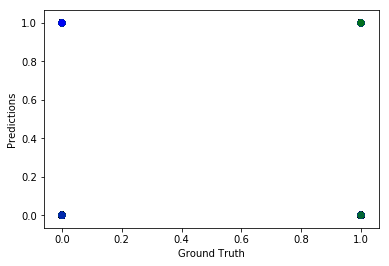

In [186]:
plt.scatter(Y_test, predictions, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show()

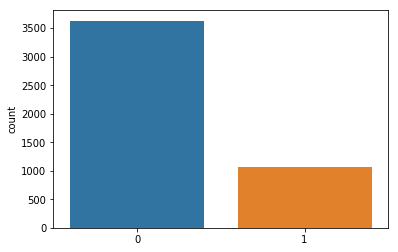

In [189]:
sns.countplot(predictions)